In [ ]:
!nvidia-smi

In [ ]:
!pip install torchsummary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
import copy

import random
import torch
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import transforms, utils
from torchsummary import summary

from trainer import *
from loss import *
from Unet import *
from preprocessing import *
from datagenerater import *
from utils import *
from progressbar import Bar
from PIL import Image


os.environ['CUDA_VISIBLE_DEVICES'] = '5'
image_size = (512, 512)
image_size = (384, 384)
image_size = (1024,1024)
n_classes = 1
train_batch = 4
test_batch = 1
loss = "dice"

SEED = 42
use_cuda = True
# Random seed
if SEED is None:
    SEED = random.randint(1, 10000)
random.seed(SEED)
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed_all(SEED)
    
# HISTORY_PATH = "/mnt/nas125/InHwanKim/weight/rsm/segmentation(all)/600_data"
# HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet512_finetune/"
HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet1024_vgg16/"

In [2]:
import glob
from natsort import natsorted
from tqdm import trange 

x_path = '/workspace/flat_feet/dataset/flat_feet/image/'
    
y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]

x_train = list()
x_val = list()

for idx in trange(len(y_train)):
    x_train.append(glob.glob(x_path+y_train[idx].split('/')[-1].split('.')[0]+'*.png')[0])
for idx in trange(len(y_val)):
    x_val.append(glob.glob(x_path+y_val[idx].split('/')[-1].split('.')[0]+'*.png')[0])

len(x_train),len(y_train),len(x_val),len(y_val)

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 187.52it/s]


(900, 900, 123, 123)

torch.Size([1024, 1024]) torch.Size([1024, 1024])


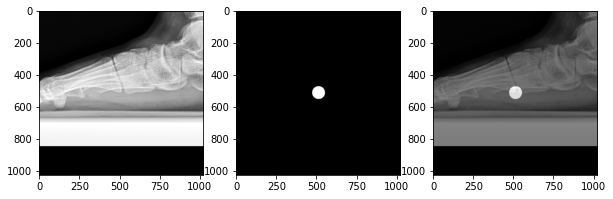

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.3s    
Epoch: 1. Train Dice:0.28539. Train Loss:0.71461
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.71966. Val Loss:0.28034
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//13/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 2. Train Dice:0.72851. Train Loss:0.27149
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.85471. Val Loss:0.14529
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//13/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 3

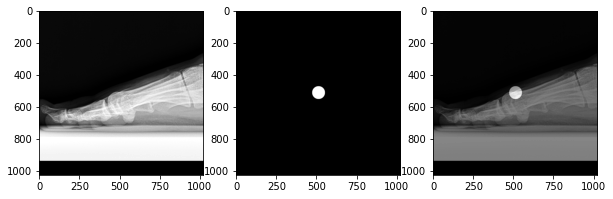

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.9s    
Epoch: 1. Train Dice:0.47609. Train Loss:0.52391
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.89594. Val Loss:0.10406
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//14/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.83807. Train Loss:0.16193
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.89580. Val Loss:0.10420
900/900: [===============================>] - ETA 0.9s    
Epoch: 3. Train Dice:0.89353. Train Loss:0.10647
123/123: [===============================>] - ETA 0.3s   
Epoch: 3. Val Dice:0.94035. Val Loss:0.05965
********************************************************************************
model_save! 

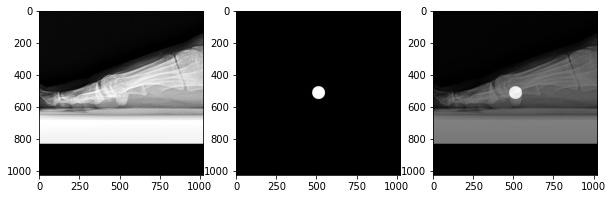

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.3s    
Epoch: 1. Train Dice:0.40140. Train Loss:0.59860
123/123: [===============================>] - ETA 0.4s   
Epoch: 1. Val Dice:0.76397. Val Loss:0.23603
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//15/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.4s    
Epoch: 2. Train Dice:0.78300. Train Loss:0.21700
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.82701. Val Loss:0.17299
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//15/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3

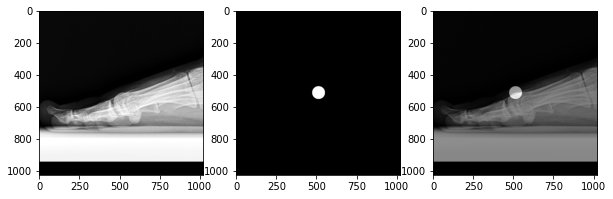

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.2s    
Epoch: 1. Train Dice:0.23575. Train Loss:0.76425
123/123: [===============================>] - ETA 0.5s   
Epoch: 1. Val Dice:0.42096. Val Loss:0.57904
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//16/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.8s    
Epoch: 2. Train Dice:0.47527. Train Loss:0.52473
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.44844. Val Loss:0.55156
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//16/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3

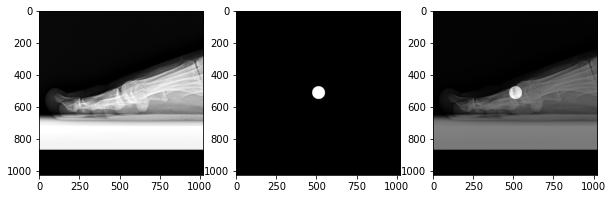

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.1s    
Epoch: 1. Train Dice:0.46244. Train Loss:0.53756
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.90433. Val Loss:0.09567
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//17/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.2s    
Epoch: 2. Train Dice:0.86708. Train Loss:0.13292
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.95496. Val Loss:0.04504
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//17/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3

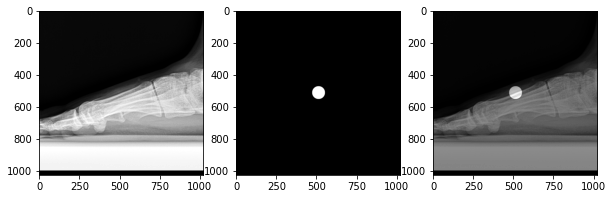

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.2s    
Epoch: 1. Train Dice:0.15710. Train Loss:0.84290
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.30967. Val Loss:0.69033
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//18/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.25714. Train Loss:0.74286
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.24672. Val Loss:0.75328
900/900: [===============================>] - ETA 0.9s    
Epoch: 3. Train Dice:0.34814. Train Loss:0.65186
123/123: [===============================>] - ETA 0.3s   
Epoch: 3. Val Dice:0.28266. Val Loss:0.71734
900/900: [===============================>] - ETA 0.9s    
Epoch: 4. Train Dice:0.40167. Trai

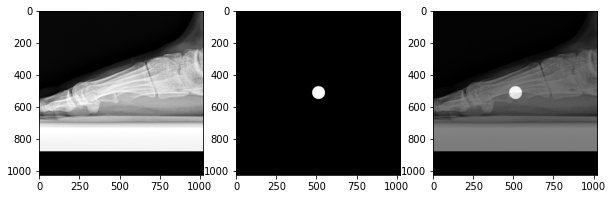

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.3s    
Epoch: 1. Train Dice:0.11456. Train Loss:0.88544
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.51521. Val Loss:0.48479
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//19/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.8s    
Epoch: 2. Train Dice:0.53495. Train Loss:0.46505
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.70557. Val Loss:0.29443
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//19/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.8s    
Epoch: 3

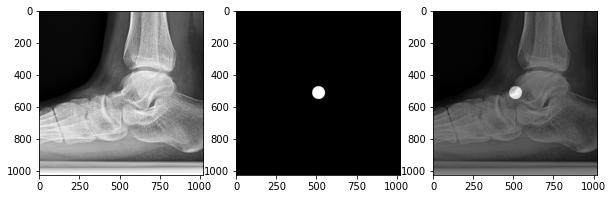

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.0s    
Epoch: 1. Train Dice:0.18788. Train Loss:0.81212
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.37846. Val Loss:0.62154
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//20/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 2. Train Dice:0.42509. Train Loss:0.57491
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.43297. Val Loss:0.56703
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//20/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 3

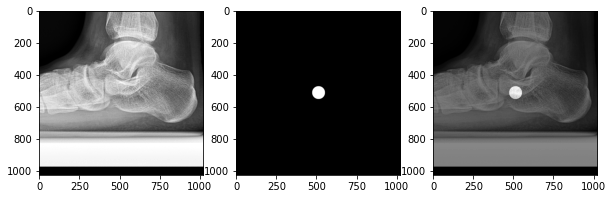

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.3s    
Epoch: 1. Train Dice:0.21253. Train Loss:0.78747
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.58975. Val Loss:0.41025
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//21/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.55714. Train Loss:0.44286
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.64358. Val Loss:0.35642
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//21/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 3

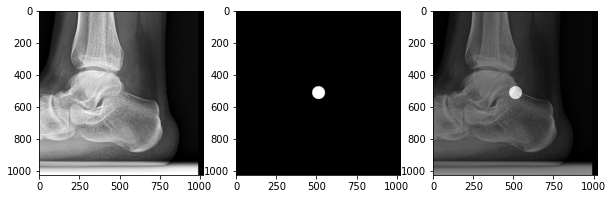

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.1s    
Epoch: 1. Train Dice:0.29179. Train Loss:0.70821
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.63316. Val Loss:0.36684
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//22/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.8s    
Epoch: 2. Train Dice:0.65740. Train Loss:0.34260
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.69044. Val Loss:0.30956
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//22/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.8s    
Epoch: 3

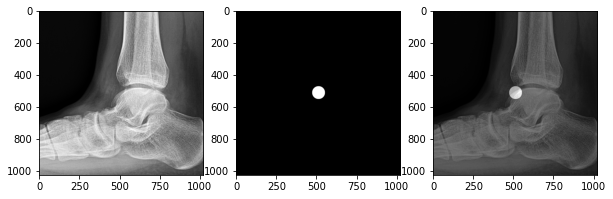

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.1s    
Epoch: 1. Train Dice:0.39359. Train Loss:0.60641
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.81250. Val Loss:0.18750
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//23/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 2. Train Dice:0.74373. Train Loss:0.25627
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.85373. Val Loss:0.14627
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//23/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3

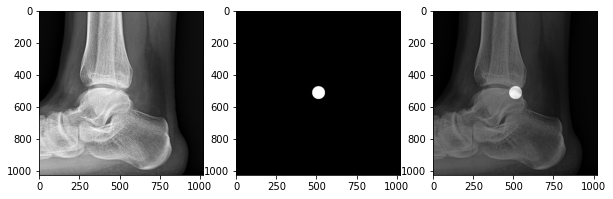

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.2s    
Epoch: 1. Train Dice:0.33946. Train Loss:0.66054
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.73182. Val Loss:0.26818
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//24/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 2. Train Dice:0.66625. Train Loss:0.33375
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.77219. Val Loss:0.22781
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//24/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 3

In [ ]:
maximum_loss = [1.0]*25
for LN in range(13,25,1):

#     DIR = '/mnt/nas125/InHwanKim/data/rsm/data(600)/'
# #     DIR = '/workspace/flat_feet/Unet/'

#     x_train = np.load(DIR + "train_images.npy")
#     y_train = np.load(DIR + "train_points.npy")
#     x_val = np.load(DIR + "valid_images.npy")
#     y_val = np.load(DIR + "valid_points.npy")
    
#     x_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[:900]
#     y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
#     x_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[900:1023]
#     y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]
    
    #x_test = np.load(DIR + "pjw_x_test.npy")
    #y_test = np.load(DIR + "pjw_y_test.npy")

    transform_train = transforms.Compose([
    Gamma_2D(),
    Shift_2D(),
    RandomBrightness(),
    Rotation_2D(),
    RandomSharp(),
    RandomBlur(),
    RandomNoise(),
    Invert(),
    RandomClahe(),
    ToTensor(),
    ])

    transform_test = transforms.Compose([
        ToTensor(),
    ])


    trainset = Dental_Single_Data_Generator(
        image_size, x_train, y_train, landmark_num = LN, mode = "train", transform=transform_train
    )
    trainloader = DataLoader(trainset, batch_size=train_batch, shuffle=True)

    testset = Dental_Single_Data_Generator(
        image_size, x_val, y_val, landmark_num = LN, mode = "train", transform=transform_test
    )
    testloader = DataLoader(testset, batch_size=1, shuffle=False)
    
    for j in range(0,1,1):
        sample = next(iter(testloader))
        image = sample['image'][0]
        mask = sample['landmarks'][0]
        
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 3, 1)
        image = np.squeeze(image,0)
        plt.imshow(image, 'gray')
        plt.subplot(1, 3, 2)
        mask = np.squeeze(mask,0)
        plt.imshow(mask,'gray')
        plt.subplot(1, 3, 3)
        print(image.shape, mask.shape)
        add = image + mask
        plt.imshow(add,'gray')
        plt.show() 
        
    
#     model = UNet(n_channels = 1, n_classes = 1)
    import segmentation_models_pytorch as smp
    # model = smp.Unet(encoder_name='timm-tf_efficientnet_lite4',decoder_attention_type='scse', in_channels = 1, classes = 1)
    # model = smp.Unet(encoder_name='timm-tf_efficientnet_lite4',decoder_attention_type=None, in_channels = 1, classes = 1)
    model = smp.Unet(encoder_name='vgg16', decoder_attention_type='scse', in_channels = 1, classes = 1)
    try:
        weight_file = natsorted(glob.glob(HISTORY_PATH+str(LN)+'/*'))[-1]
        weight = torch.load(weight_file)
        model.load_state_dict(weight)
        print('load weight')
    except:
        print('no weight')
    
    if torch.cuda.device_count() > 1:
        print("Let's use", torch.cuda.device_count(), "GPUs!")      
        model = nn.DataParallel(model)

    device = torch.device('cuda')

    if device is not None:
        print("Use GPU: {} for training".format(device))

    if not torch.cuda.is_available():
        print('using CPU, this will be slow')
    else:
        model.to(device)

    #summary(model, input_size=(1, 512, 512))
    best_acc_wts = copy.deepcopy(model.state_dict())

    #criterion = BinaryDiceLoss().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr = 5e-4)    
    
    mean_train_losses = []
    mean_val_losses = []
    
    for epoch in range(10):
        train_losses = []
        train_dice = []
        val_losses = []
        val_dice = []
        
        
        for batch_idx, sample in enumerate(Bar(trainloader)):    

            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)

            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)

            train_losses.append(loss.data.cpu().numpy())
            train_dice.append(ddice.data.cpu().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('Epoch: {}. Train Dice:{:.5f}. Train Loss:{:.5f}'.format(epoch+1, np.mean(train_dice), np.mean(train_losses)))

        for batch_idx, sample in enumerate(Bar(testloader)):    
            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)
            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)
            val_losses.append(loss.data.cpu().numpy())
            val_dice.append(ddice.data.cpu().numpy())
            
        print('Epoch: {}. Val Dice:{:.5f}. Val Loss:{:.5f}'.format(epoch+1, np.mean(val_dice), np.mean(val_losses)))

        mean_train_losses.append(np.mean(train_losses))
        mean_val_losses.append(np.mean(val_losses))
        # Print Loss
        if(np.mean(val_losses) < maximum_loss[LN]):
            maximum_loss[LN] = np.mean(val_losses)
            
            directory = HISTORY_PATH  + "/" +str(LN)
            
            if not os.path.exists(directory):
                os.makedirs(directory)
                
            filename = directory  + "/"  +'weight.pth'                          
            torch.save(model.state_dict(), filename)
            print("*"*80)
            print("model_save!",filename)
            print("*"*80)